## Exploratory Data Analysis

Let's start with an Exploratory Data Analysis. What we can say about about our dataset? 
Now we summarize its main characteristics with visual and tabular methods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/giord/Desktop/università/FDS (galasso)/ASS finale/dataset/train.csv")

In [3]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [4]:
print("Number of reviews (rows):", dataset.shape[0], "\n Number of columns:", dataset.shape[1], "\n Name of columns:", *list(dataset.columns) )

Number of reviews (rows): 43957 
 Number of columns: 15 
 Name of columns: age workclass fnlwgt education educational-num marital-status occupation relationship race gender capital-gain capital-loss hours-per-week native-country income_>50K


Here we can see the number of modalities and number of NA value for each variable:

In [5]:
data = []
for i in range(len(list(dataset.columns))):
    c = list(dataset.columns)[i]
    data.append([c, type(dataset[c][1]), dataset[c].nunique(), dataset.shape[0] - dataset[c].count()])
print(pd.DataFrame(data=data, columns=["column", "type_val", "unique_count", "None_count"]))

             column               type_val  unique_count  None_count
0               age  <class 'numpy.int64'>            74           0
1         workclass          <class 'str'>             8        2498
2            fnlwgt  <class 'numpy.int64'>         26646           0
3         education          <class 'str'>            16           0
4   educational-num  <class 'numpy.int64'>            16           0
5    marital-status          <class 'str'>             7           0
6        occupation          <class 'str'>            14        2506
7      relationship          <class 'str'>             6           0
8              race          <class 'str'>             5           0
9            gender          <class 'str'>             2           0
10     capital-gain  <class 'numpy.int64'>           122           0
11     capital-loss  <class 'numpy.int64'>            97           0
12   hours-per-week  <class 'numpy.int64'>            94           0
13   native-country          <clas

Here we see the modality of our features:

In [6]:
data = []
for i in range(len(list(dataset.columns))):
    c = list(dataset.columns)[i]
    print(f"Unique values of colums {c} is :{dataset[c].unique()}")
    print("\n")

Unique values of colums age is :[67 17 31 58 25 59 70 35 28 21 30 20 45 76 54 19 44 47 37 27 24 49 36 71
 62 64 53 34 42 26 43 23 56 40 63 50 29 52 33 38 66 46 32 68 41 80 73 39
 57 51 69 22 18 55 65 60 48 61 72 90 74 77 75 81 82 88 84 83 79 78 85 89
 87 86]


Unique values of colums workclass is :['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay']


Unique values of colums fnlwgt is :[366425 244602 174201 ...  68982 116562 375827]


Unique values of colums education is :['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']


Unique values of colums educational-num is :[16  8 13  4 10  9  5  6  7 14  1  3 15 11  2 12]


Unique values of colums marital-status is :['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


Unique values of colums occ

## Plots

Let's start with visualization method to understand better the characteristic of variables and the relationship between them.

In [7]:
def plot_cat_var(var):
    fig, ax = plt.subplots(2, figsize = (12,12),constrained_layout = True)
    ax[0] = dataset.groupby(var)["income_>50K"].mean().plot(kind = "bar", ax = ax[0], title = f"income by {var}")
    ax[1] = sns.countplot(ax = ax[1],data = dataset, x = var).set_title(f"{var} distribution")
    plt.xticks(rotation = 90)
    plt.show()
    

## Plots part 1
### Feature distributions and their relationship with income

### Age

In [8]:
dataset["age_group"] = pd.cut(dataset.age,bins = [18,30,40,50,60,70,80,90,100])

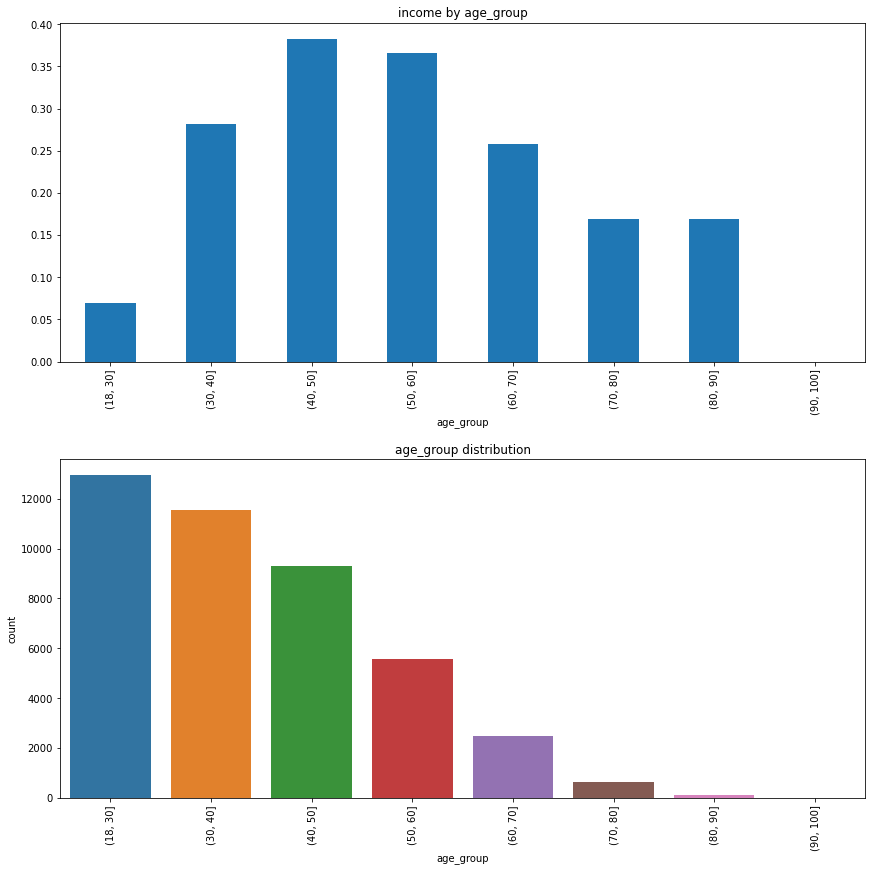

In [9]:
plot_cat_var("age_group")

As we could imagine, **middle-aged** people have more chance of having an annual income greater than 50k with respect to the younger and the older. In particular the younger that likely are still in the learning phase have a income less than all.  

### Workclass

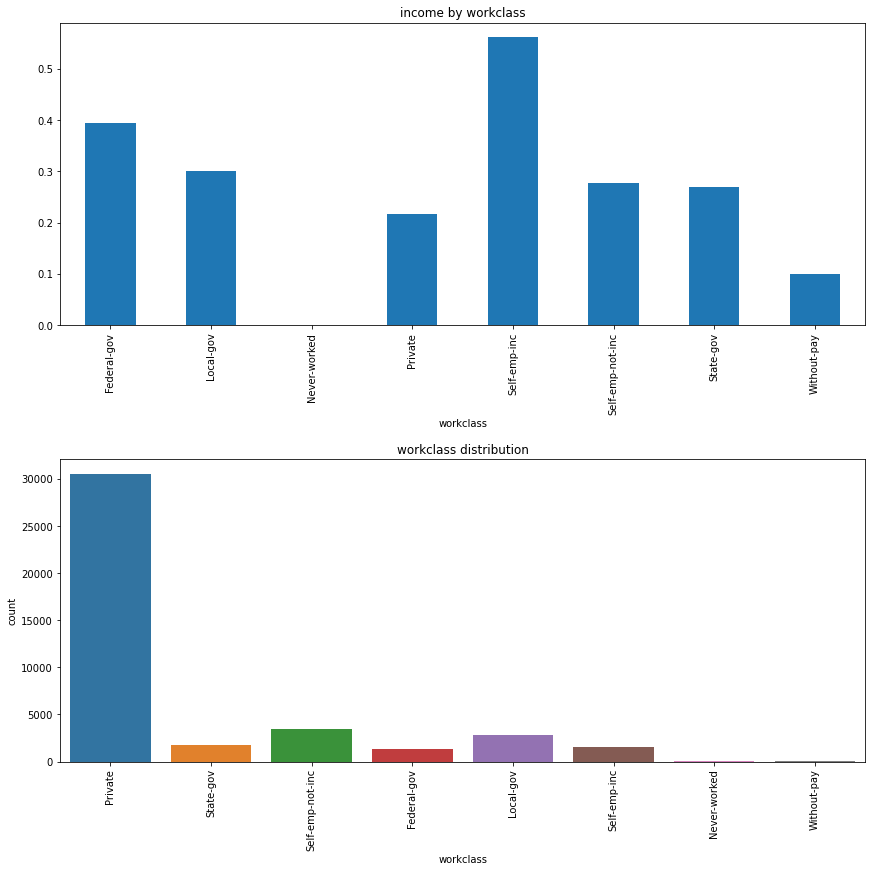

In [10]:
plot_cat_var("workclass")

We note that the people who manage an activity as an individual enterprise have more chance of having more than 50k of income because their work does not provide for profit limits.

### Education

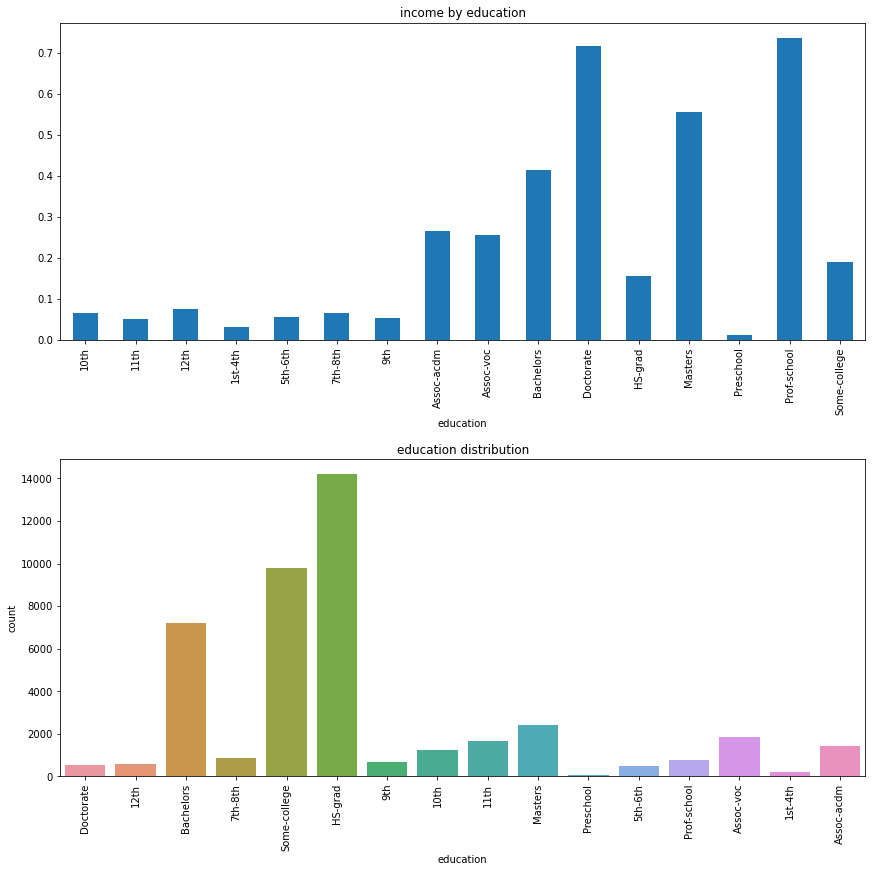

In [11]:
plot_cat_var("education")

As logical to think, as the level of `education` increases the proportion of people who have a higher income of 50k

### Martial Status

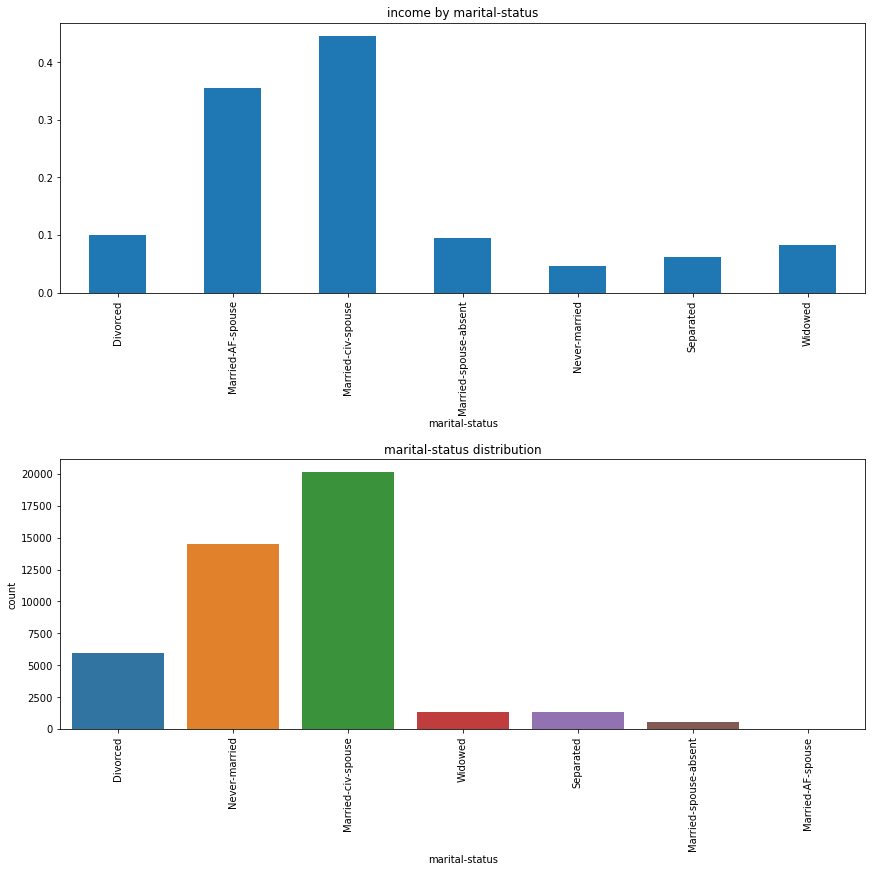

In [12]:
plot_cat_var("marital-status")

As we can see `marital status` distribution presents two well-defined clusters: `married`-`not married`. we could choose to bin this variable in this way 

### Occupation

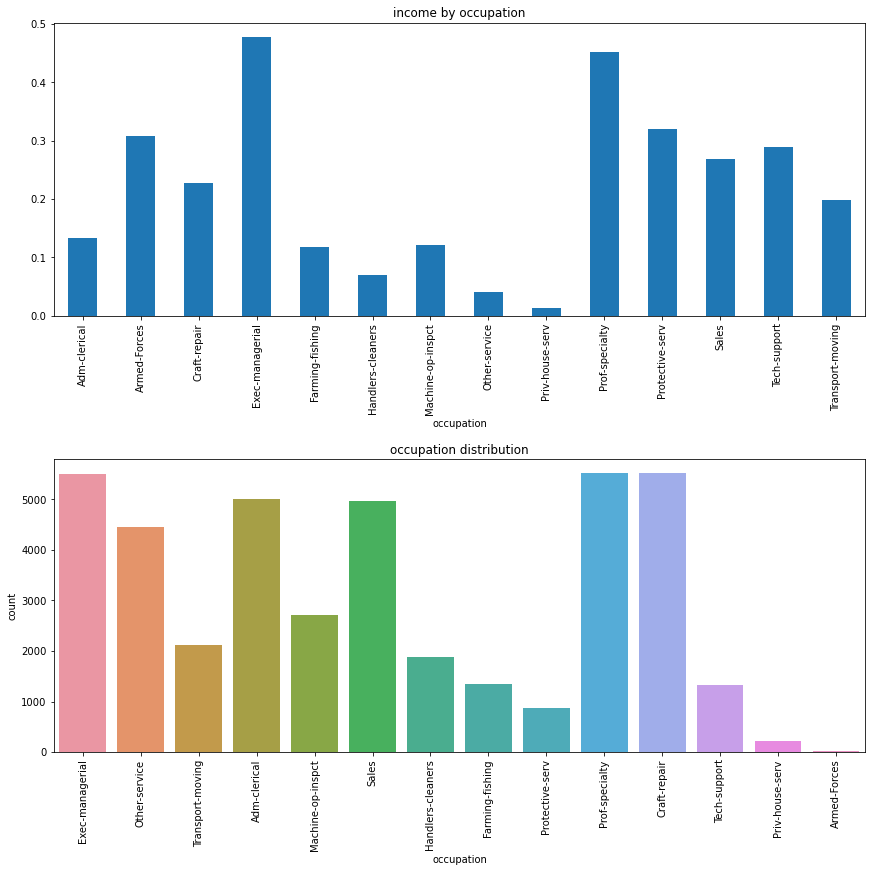

In [13]:
plot_cat_var("occupation")

### Relationship

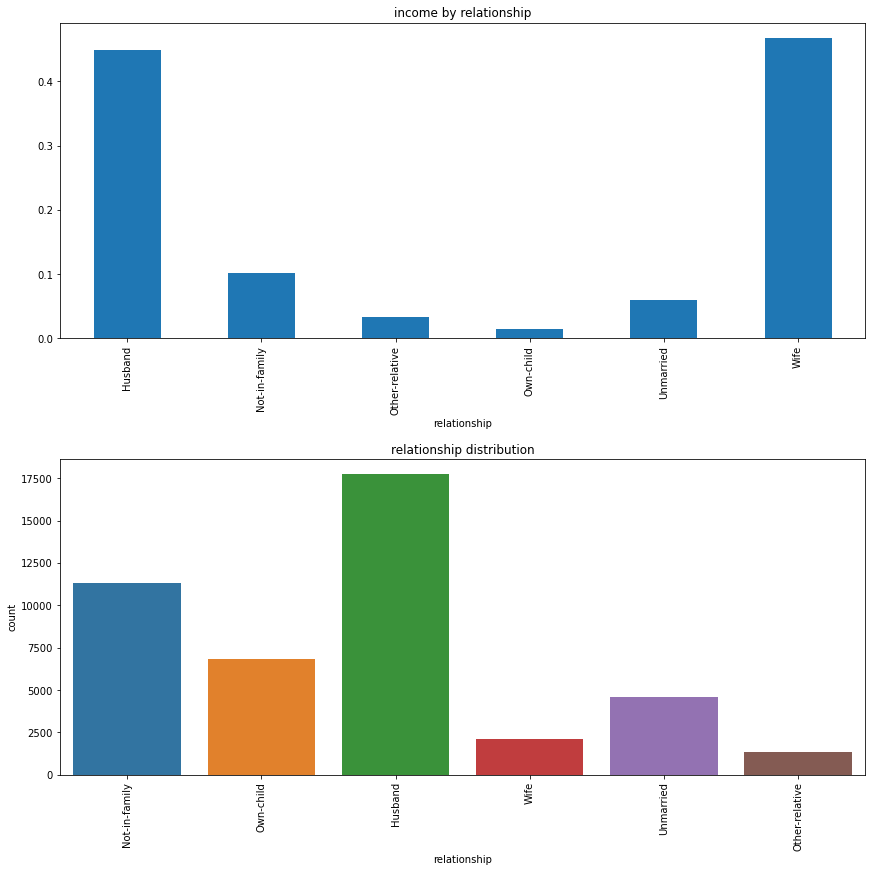

In [14]:
plot_cat_var("relationship")

Against all odds the group of **wives** earning more than 50k outnumbers the group of **husbands**. We will go deep on this analysis later when we'll analyze "gaps"

### Race

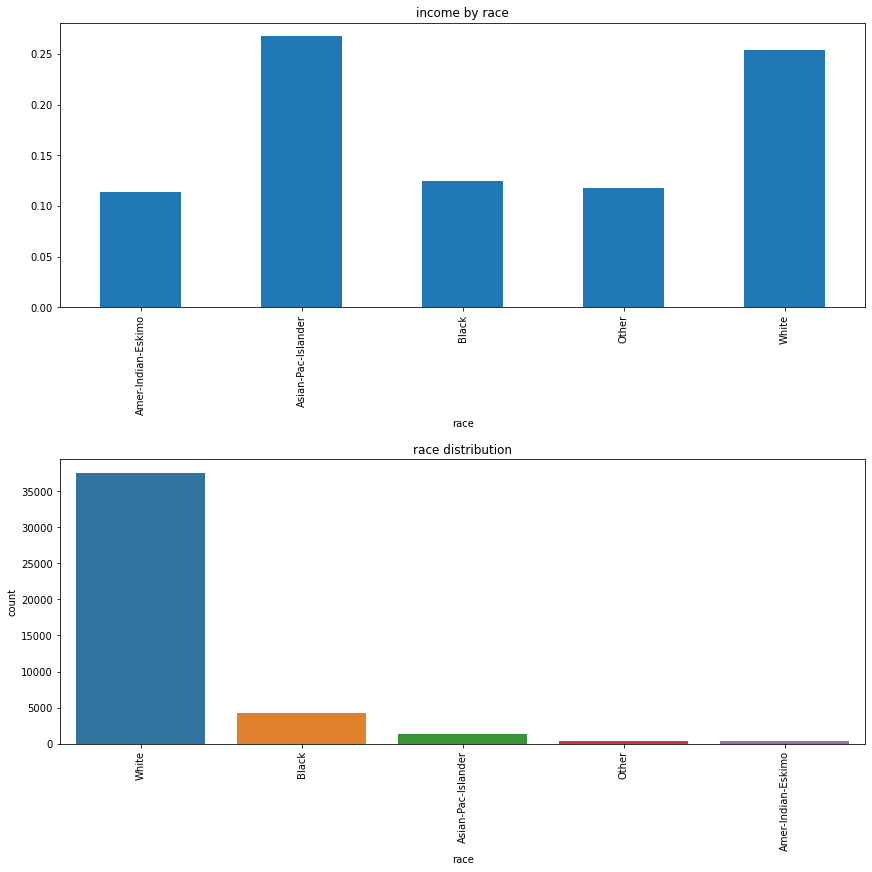

In [15]:
plot_cat_var("race")

White and asian groups has the gratest proportion of `rich` people. howewer **white** class is the most represented in this dataset 

### Gender

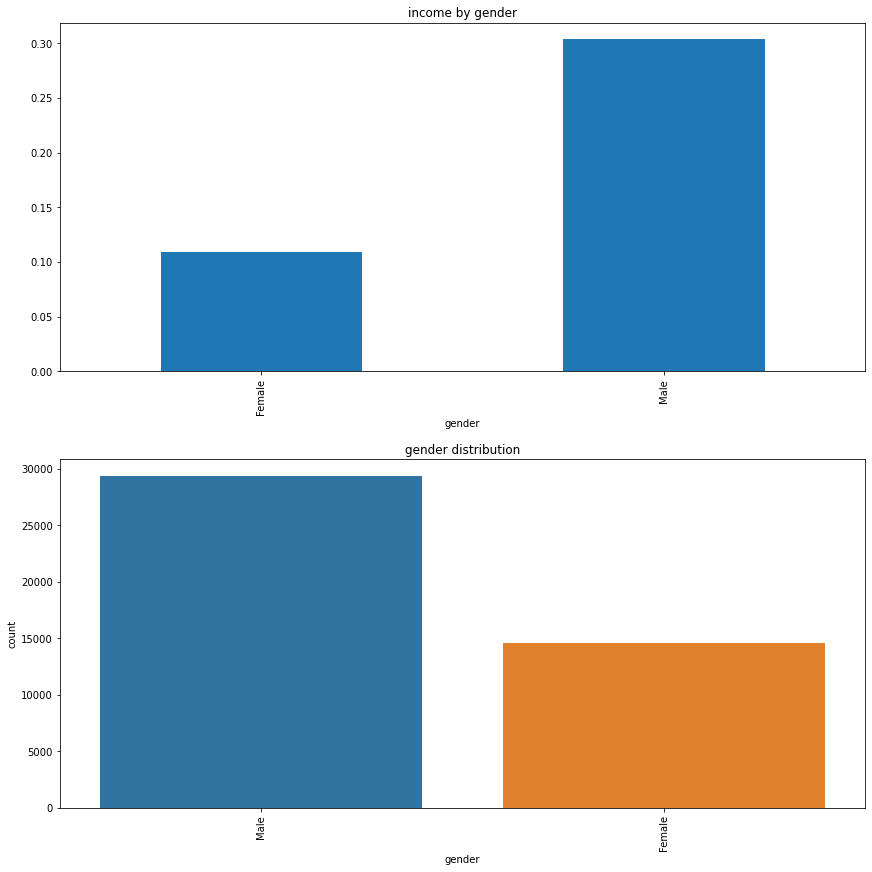

In [16]:
plot_cat_var("gender")

This plot shows a different situation respect to `relationship` plot. Now the man earns more than women

### Hours-per-week

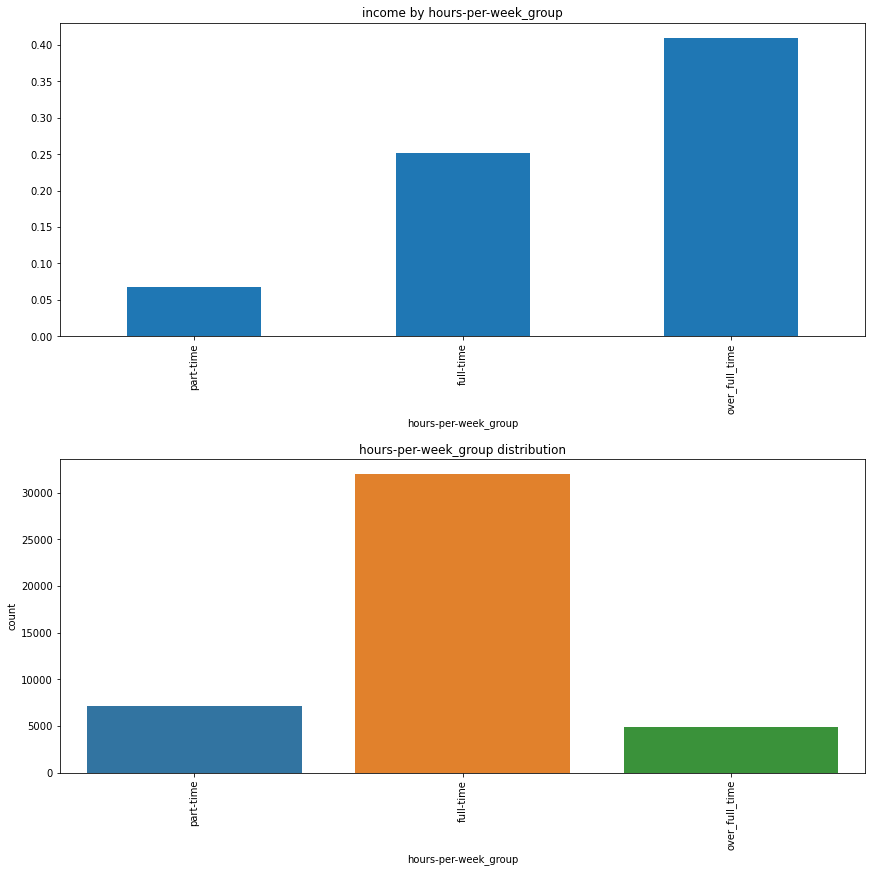

In [17]:
dataset["hours-per-week_group"] = pd.cut(dataset["hours-per-week"], bins = [0,30,50,100], labels = ["part-time",
                                                                                                   "full-time",
                                                                                                   "over_full_time"])
plot_cat_var("hours-per-week_group")

We decided to encode hours per week in 3 groups. From this visualization we can see clearly the linear relationship between the hours and the proportion of rich people. Howewer the full-time group is the most represented class

### Native-country

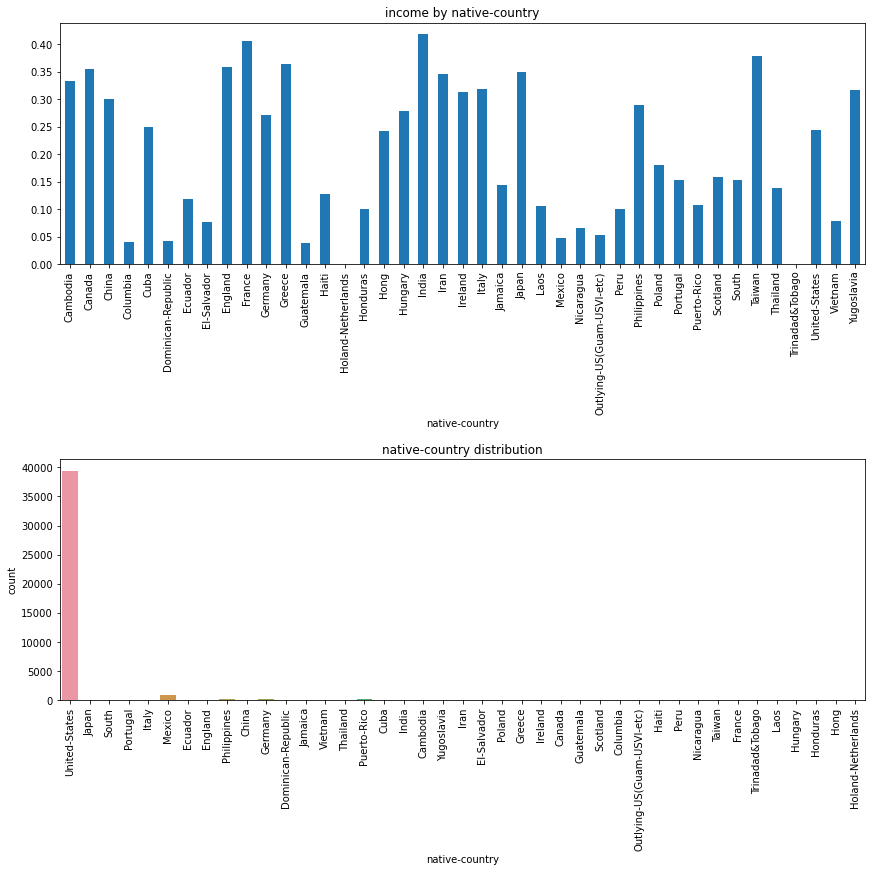

,index,native-country
0,United-States,0.912835
1,Mexico,0.020373
2,Philippines,0.006320
3,Germany,0.004352
4,Puerto-Rico,0.003866


In [18]:
plot_cat_var("native-country")
dataset["native-country"].value_counts(normalize = True).reset_index().head()

United States is the most represented (~ 91%). That means this variable should be binned in a way like: `US` - `Not US`. So modalities that are not USA are poorly represented by the dataset and so studying this encoded variable could be misleading.

## Plots part 2: Gaps Plot

Now we'll study deeply the gap between categories (for instance man - women or US - Not US)

### Native-country & Occupation

In [20]:
# US : Not-US 
dataset["country-encoded"] = dataset["native-country"].apply(lambda x: "US" if x == "United-States"
                                                             else "Not-US")

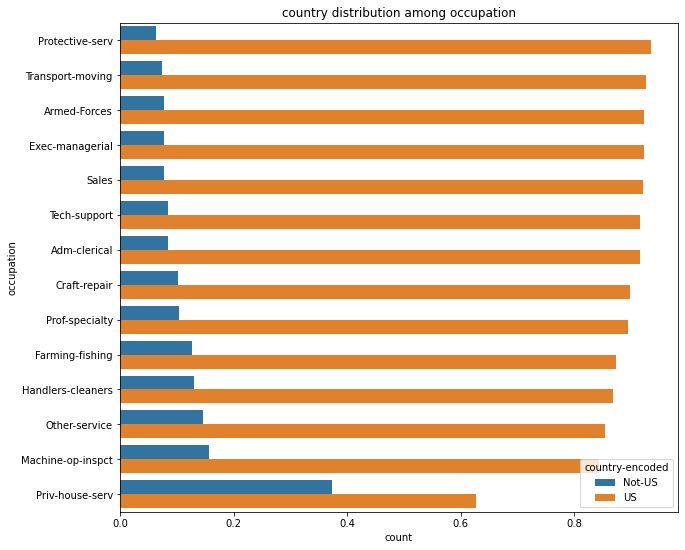

In [21]:
plt.figure(figsize = (10,9))
gaps = dataset.groupby(["occupation","country-encoded"]).size().reset_index(name='count')
s = dataset.occupation.value_counts()
gaps['count'] = gaps['count'].div(gaps['occupation'].map(s))
sns.barplot(data = gaps.sort_values("count"), y = "occupation", x = 'count', hue = "country-encoded")
plt.title("country distribution among occupation")
plt.show()

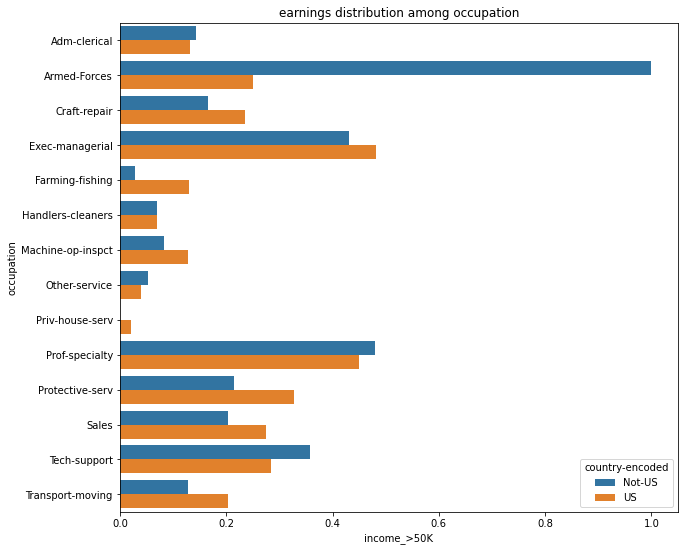

In [22]:
plt.figure(figsize = (10,9))
gaps = dataset.groupby(["occupation","country-encoded"])["income_>50K"].mean()
sns.barplot(data = gaps.reset_index(), y = "occupation", x = 'income_>50K', hue = "country-encoded")
plt.title("earnings distribution among occupation")
plt.show()

As we can imagine `Not-US`people works mainly in priv-house-serv, although in many sectors `Not-US` seems to earn same as `US` collegues.

### Sex & Occupation

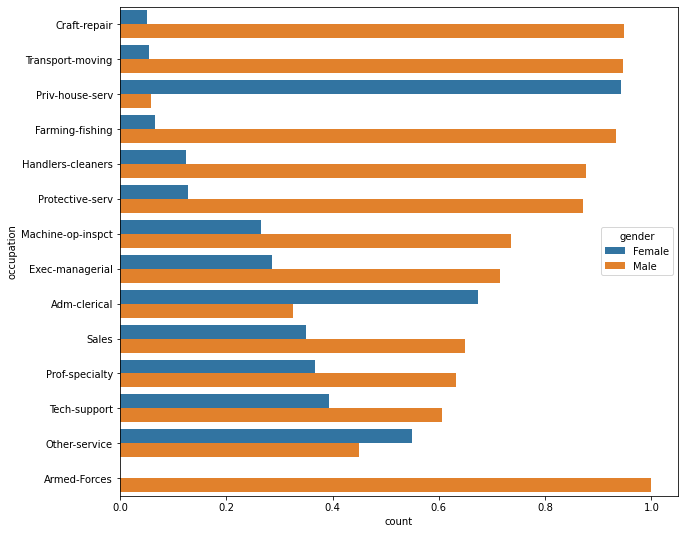

In [25]:
plt.figure(figsize = (10,9))
gaps = dataset.groupby(["occupation","gender"]).size().reset_index(name='count')
s = dataset.occupation.value_counts()
gaps['count'] = gaps['count'].div(gaps['occupation'].map(s))
sns.barplot(data = gaps.sort_values("count"), y = "occupation", x = 'count', hue = "gender")
plt.show()

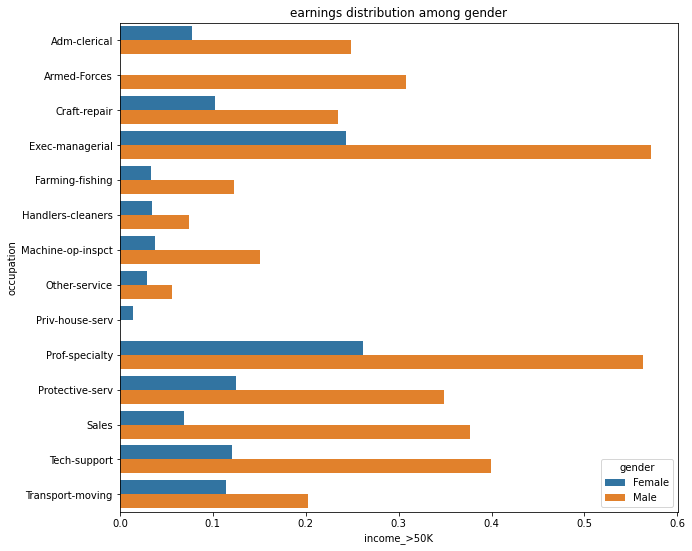

In [34]:
plt.figure(figsize = (10,9))
gaps = dataset.groupby(["occupation","gender"])["income_>50K"].mean()
sns.barplot(data = gaps.reset_index(), y = "occupation", x = 'income_>50K', hue = "gender")
plt.title("earnings distribution among gender")
plt.show()

`Adm-clerical` and `Priv-house-serv` are the class with the majority of **women** and the presence of women who earns > 50k is **dramatically inferior** to `man` class globally.

### Education,native-country & income

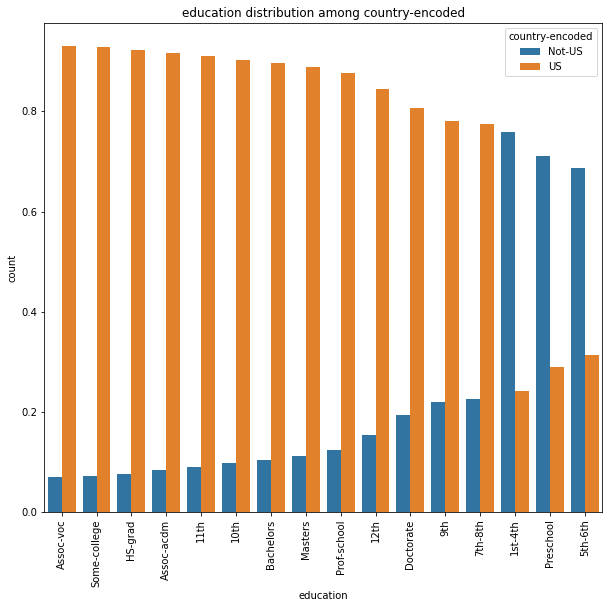

In [32]:
plt.figure(figsize = (10,9))
gaps = dataset.groupby(["education","country-encoded"]).size().reset_index(name='count')
s = dataset.education.value_counts()
gaps['count'] = gaps['count'].div(gaps['education'].map(s))
sns.barplot(data = gaps.sort_values("count"), x = "education", y = 'count', hue = "country-encoded")
plt.xticks(rotation = 90)
plt.title("education distribution among country-encoded")
plt.show()

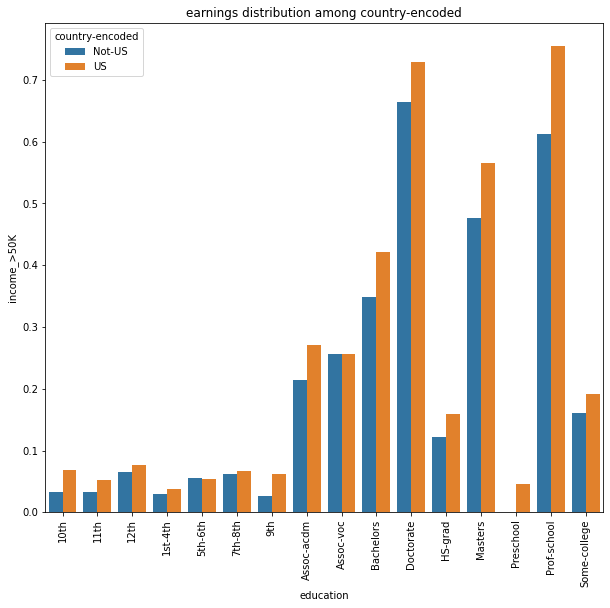

In [33]:
plt.figure(figsize = (10,9))
gaps = dataset.groupby(["education","country-encoded"])["income_>50K"].mean()
sns.barplot(data = gaps.reset_index(), x = "education", y = 'income_>50K', hue = "country-encoded")
plt.title("earnings distribution among country-encoded")
plt.xticks(rotation = 90)
plt.show()

As we can imagine not-US people rule over low-class education categories while US ones has higher studies in average.
Howewer if an `Us` and a `not US` has the same study level they almost have the same probability to have an income > 50k.
it is a good **news**!
